# 1 - Introduction

Nama : Dicky Librata Sembiring 

Dataset : Churn

Objective : Memprediksi Customer yang akan berhenti (churn)


## Link Streamlit
https://huggingface.co/spaces/barentz96/Milestone_1_Phase_2

# 2 - Import Libraries

> Berikut adalah library python yang digunakan

In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint

from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.compose import ColumnTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor

import phik
from phik import resources, report

import pickle

np.random.seed(0)

# 3 - Data Loading

> Selanjutnya dilakukan loading dataset. Kemudian beberapa eksplorasi sederhana seperti melihat jumlah baris dan kolom data, nama dan type data masing - masing kolom, serta basic info dari data yang telah di load

In [2]:
# Load Dataset
df_ori = pd.read_csv('churn.csv', parse_dates=['joining_date'])

# Setting display pandas dataframe showing all columns
pd.set_option('display.max_columns', None) 
# Setting format floating to 2 decimal
pd.options.display.float_format = '{:.2f}'.format

Dari sumber dataset, penulis memperoleh informasi mengnai masing - masing column sebagai berikut:

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

In [3]:
# Duplicate Dataset
# Dilakukan agar data set original tidak berubah apabila dilakukan pengolahan pada data
df = df_ori.copy()
# Showing First 10 Data
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.00,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.00,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.00,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.00,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.00,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [4]:
# Jumlah baris dan kolom serta nama kolom
print(f"Jumlah baris : {df.shape[0]}")
print(f"Jumlah kolom : {df.shape[1]}")
print(f"Nama kolom : {df.columns}")


Jumlah baris : 37010
Jumlah kolom : 22
Nama kolom : Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')


In [5]:
# Check basic info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       37010 non-null  object        
 1   age                           37010 non-null  int64         
 2   gender                        36951 non-null  object        
 3   region_category               31579 non-null  object        
 4   membership_category           37010 non-null  object        
 5   joining_date                  37010 non-null  datetime64[ns]
 6   joined_through_referral       31568 non-null  object        
 7   preferred_offer_types         36722 non-null  object        
 8   medium_of_operation           31615 non-null  object        
 9   internet_option               37010 non-null  object        
 10  last_visit_time               37010 non-null  object        
 11  days_since_last_login       

In [6]:
# Check Numerical Dataset 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.00,37.12,15.87,10.00,23.00,37.00,51.00,64.00
days_since_last_login,37010.00,-41.94,228.88,-999.00,8.00,12.00,16.00,26.00
avg_time_spent,37010.00,279.20,330.02,0.00,60.12,161.77,356.52,3235.58
avg_transaction_value,37010.00,29272.43,19445.96,800.46,14177.83,27554.49,40858.67,99914.05
avg_frequency_login_days,37010.00,14.66,9.48,0.00,7.00,14.00,22.00,73.06
points_in_wallet,37010.00,623.59,270.22,0.00,574.22,680.40,756.99,2069.07
churn_risk_score,37010.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00


Berdasarkan tabel, dapat dilihat bahwa column `Age` memiliki rata-rata `37.12`. Boleh di asumsikan bahwa secara global, mayoritas customer merupakan masyarakat dengan usia produktif

Dari informasi diatas penulis memutuskan untuk melakukan droping kolom `user_id`, Karena hanya berisi informasi untuk masing masing customer dan tidak relevan untuk digunkan sebagai pembelajaran model

In [7]:
# Drop column Id
df = df.drop(columns=['user_id'])

# 4 - Exploratory Data Analysis (EDA)

Setelah mengetahui beberapa info dasar, penulis kemudian melakukan eksplorasi lanjutan berupa pengecekan apakah ada data yang memiliki `duplicate` atau `missing value`, cek `distribusi data`, mencari `Insight` yang dapat disimpulkan, serta mencari hubungan setiap kolom terhadap kolom `churn risk score` yang merupakan target dari dataset ini

Langkah pertama adalah melakukan Extracting kolom `joining date` menjadi beberapa kolom seperti `tahun`, `bulan`, dan `jumlah hari sejak join`

Setelah itu melakukan droping kolom joining date karena sudah tidak relevan

In [8]:
# extract year
df['year'] = df['joining_date'].dt.year
df['year'] = df['joining_date'].astype(str)
# extract month
df['month'] = df['joining_date'].dt.month


In [9]:
# find maximum date
max_date = df['joining_date'].max()

# calculate difference in days between date and maximum date
df['days_since_join'] = (max_date - df['joining_date']).dt.days

# drop joining date column
df = df.drop(columns=['joining_date', 'last_visit_time'])

Dari data loading, diperoleh informasi bahwa days_since_last_login memiliki nilai minimum `-999`. Ini merupakan missing value yang tidak natural. Sehingga penulis melakukan penggantian nilai `-999` menjadi `0`

In [10]:
# replace -999 to 0
df.days_since_last_login.replace({-999: 0}, inplace=True)

Setelah melakukan feature extraction pada beberapa kolom, penulis mencari korelasi antara setiap kolom dengan kolom `churn_risk_score` sebagai target dengan menggunakan `phi korelasi`

In [11]:
# Cek nilai korelasi semua fitur dengan kolom price
val_phik = df.phik_matrix().churn_risk_score

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score', 'month', 'days_since_join']


d:\Miniconda\envs\tf\lib\site-packages\phik\data_quality.py:57: UserWarning: The number of unique values of variable year is large: 1096. Are you sure this is not an interval variable? Analysis for pairs of variables including year can be slow.
  warnings.warn(


In [12]:
# Sort nilai korelasi phi_k secara descending
val_phik = val_phik.sort_values(ascending=False)
val_phik

churn_risk_score               1.00
membership_category            0.94
feedback                       0.46
points_in_wallet               0.45
avg_transaction_value          0.41
avg_frequency_login_days       0.17
joined_through_referral        0.06
offer_application_preference   0.03
preferred_offer_types          0.03
avg_time_spent                 0.02
days_since_join                0.02
days_since_last_login          0.02
used_special_discount          0.01
region_category                0.01
medium_of_operation            0.01
past_complaint                 0.01
month                          0.01
complaint_status               0.00
internet_option                0.00
gender                         0.00
year                           0.00
age                            0.00
Name: churn_risk_score, dtype: float64

Nilai korelasi `phi_k` adalah `0 = tidak berkorelasi` dan `1 = sangat berkorelasi`.

Dari nilai ini penulis menentukan threshold `0.02` yang memiliki arti `minimal terdapat 2 percent koreleasi`

Sehingga diperoleh dataset baru seperti berikut ini

In [13]:
df = df[val_phik[0:12].index]
df.head(3)

,churn_risk_score,membership_category,feedback,points_in_wallet,avg_transaction_value,avg_frequency_login_days,joined_through_referral,offer_application_preference,preferred_offer_types,avg_time_spent,days_since_join,days_since_last_login
0,1,No Membership,Poor Website,627.48,38604.69,10.00,Yes,Yes,Without Offers,1184.49,270,4
1,1,Basic Membership,Poor Customer Service,575.97,7665.66,17.00,Yes,No,Without Offers,338.15,275,11
2,0,Silver Membership,Too many ads,767.93,37671.69,5.00,NaN,No,Credit/Debit Card Offers,235.14,323,8


Dari dataset baru, kemudian penulis menentukan apakah suatu kolom termasuk numerikal atau kategorikal dan kolom target

In [14]:
# separate numerikal and string type
num_col = ['points_in_wallet', 'avg_transaction_value', 'avg_frequency_login_days', 'avg_time_spent', 'days_since_join', 'days_since_last_login']

cat_col = ['membership_category', 'joined_through_referral', 'feedback', 'offer_application_preference', 'preferred_offer_types']

target = ['churn_risk_score']

print('Numerical Columns : ', num_col)
print('\nCategorical Columns : ', cat_col)

Numerical Columns :  ['points_in_wallet', 'avg_transaction_value', 'avg_frequency_login_days', 'avg_time_spent', 'days_since_join', 'days_since_last_login']

Categorical Columns :  ['membership_category', 'joined_through_referral', 'feedback', 'offer_application_preference', 'preferred_offer_types']


## Cek Missing Value dan Duplicate
Dari dataset baru kemudian dilakukan pengecekan missing value dan data duplicate karena model tidak dapat menerima missing value dan duplikat data akan membuat hasil prediksi model menjadi bias. Sehingga dilakukan proses handling missing value dan data dupilkat

In [15]:
# Cek missing value dan duplicated data
num_miss_val = 0
for i in df:
    miss_val = df[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        print(f'Percentage of missing value {i} : {miss_val/len(df[i].values)*100:.2f}%')
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

print(f"Duplicates Data : {df.duplicated().sum()}")
print(f'Percentage of Duplicate Data {i} : {(df.duplicated().sum()/len(df[i].values)*100):.2f}%')

joined_through_referral  :  5442
Percentage of missing value joined_through_referral : 14.70%
preferred_offer_types  :  288
Percentage of missing value preferred_offer_types : 0.78%
Duplicates Data : 18
Percentage of Duplicate Data days_since_last_login : 0.05%


- Ditemukan missing value pada dataset yaitu pada kolom `joined_through_referral` dengan jumlah `5442` data dan `preferred_offer_types` sebanyak `288` data. Karena total data secara global cukup besar sehingga akan dilakukan `trimming` untuk menghindari nilai sintetis pada dataset

- Terdapat `18` data duplicate pada dataset yaitu `0.05%` dari jumlah keseluruhan data. Karena salah satu kriteria ( asumsi ) yang harus di penuhi pada machine learning adalah `tidak ada duplicate data` maka harus dilakukan `trimming` pada data ini.


In [16]:
# Drop missing value
df= df.dropna()

# Drop data duplicate
df = df.drop_duplicates()

In [17]:
# Cek kembali missing value dan duplicated data
num_miss_val = 0
for i in df:
    miss_val = df[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        print(f'Percentage of missing value {i} : {miss_val/len(df[i].values):.2f}%')
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

print(f"Duplicates Data : {df.duplicated().sum()}")
print(f'Percentage of Duplicate Data {i} : {df.duplicated().sum()/len(df[i].values):.2f}%')

Tidak Ada Missing Value
Duplicates Data : 0
Percentage of Duplicate Data days_since_last_login : 0.00%


Setelah tidak ada data yang memiliki missing value maupun data duplicate selanjutnya dilakukan analisa deskiriptif untuk memperoleh insight data dataset

## Analisa Deskriptif

Karena model yang akan di bangun adalah prediksi `customer churn`, maka penulis berfokus pada analisa kolom `churn risk score`

### Global Customer

In [18]:
# Jumlah dan persentase customer menurut churn score
print(df['churn_risk_score'].value_counts())
print(df['churn_risk_score'].value_counts(normalize=True))

1    16895
0    14414
Name: churn_risk_score, dtype: int64
1   0.54
0   0.46
Name: churn_risk_score, dtype: float64


In [19]:
# Groupby column churn score
df.groupby('churn_risk_score')[num_col].mean()

,points_in_wallet,avg_transaction_value,avg_frequency_login_days,avg_time_spent,days_since_join,days_since_last_login
churn_risk_score,,,,,,
0,680.49,33947.95,13.50,284.72,548.59,11.98
1,574.55,25364.29,15.66,275.05,541.03,12.17


Dari dua query diatas diperoleh beberapa informasi yaitu :

- Secara global, customer yang akan `churn` sebanyak `20018 customer` sedangkan yang `tidak` sebanyak `16992`

- Secara global beberapa yang membedakan antara customer yang akan churn dan tidak adalah sbb :
    - Customer yang churn memiliki :
        - Rata - rata `points in wallet` lebih rendah dari yang tidak churn
        - Memiliki `avg transaction` lebih sedikit dari yang tidak churn

- Customer yang churn maupun yang tidak memiliki `demografi days_since_join, day since last login, avg login frequency, dan avg time spent yang relatif serupa.`

### Customer Churn

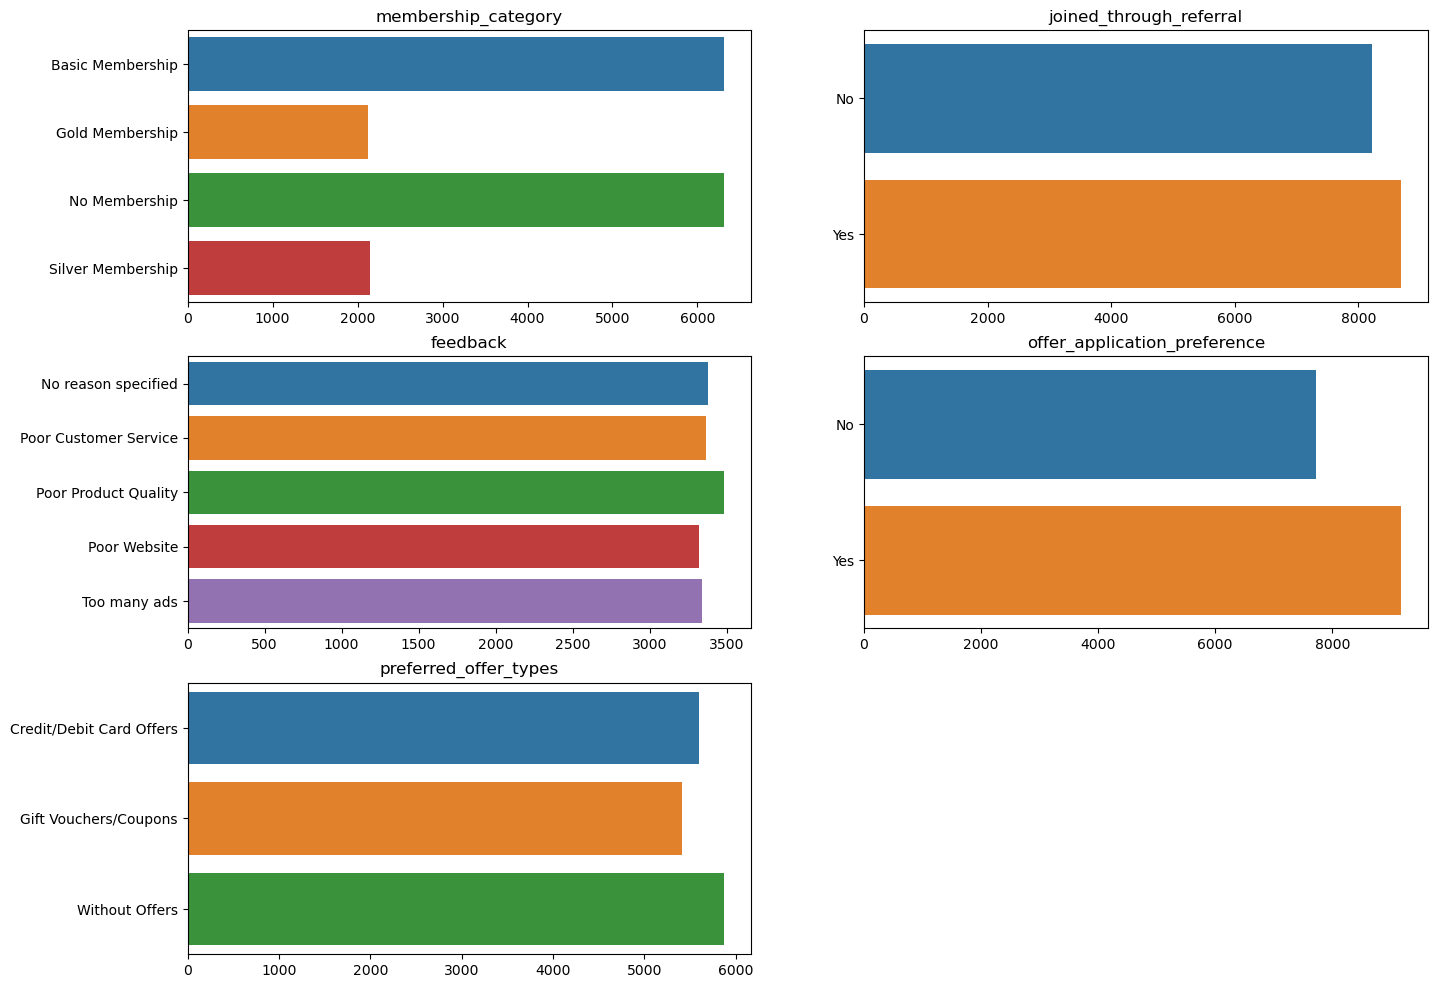

In [20]:
# Making a figure with 16 x 12 size
plt.figure(figsize=[16,12])
df_1 = df[df['churn_risk_score']==1]

count  = 321
for i in cat_col:
    plt.subplot(count)
    sns.barplot(data=df_1, y=df_1.groupby(i).size().index, x=df_1.groupby(i).size().values)
    plt.title(i)
    plt.ylabel('')
    count += 1


Dari visualisasi diatas penulis memperoleh informasi mengenai customer yang akan churn sbb :
- Mayoritas Adalah customer yang tidak memiliki membership dan basic membership dan sedikit customer dengan gold dan silver membership
- Semua feedback dari customer adalah feedback yang buruk
- Perbandingan antara customer yang mendaftar dengan refferal dan tidak relatif sama
- Perbandingan antara customer yang menggunakan offer dan jenis offer yang di pakai juga relatif sama

### Customer Not Churn

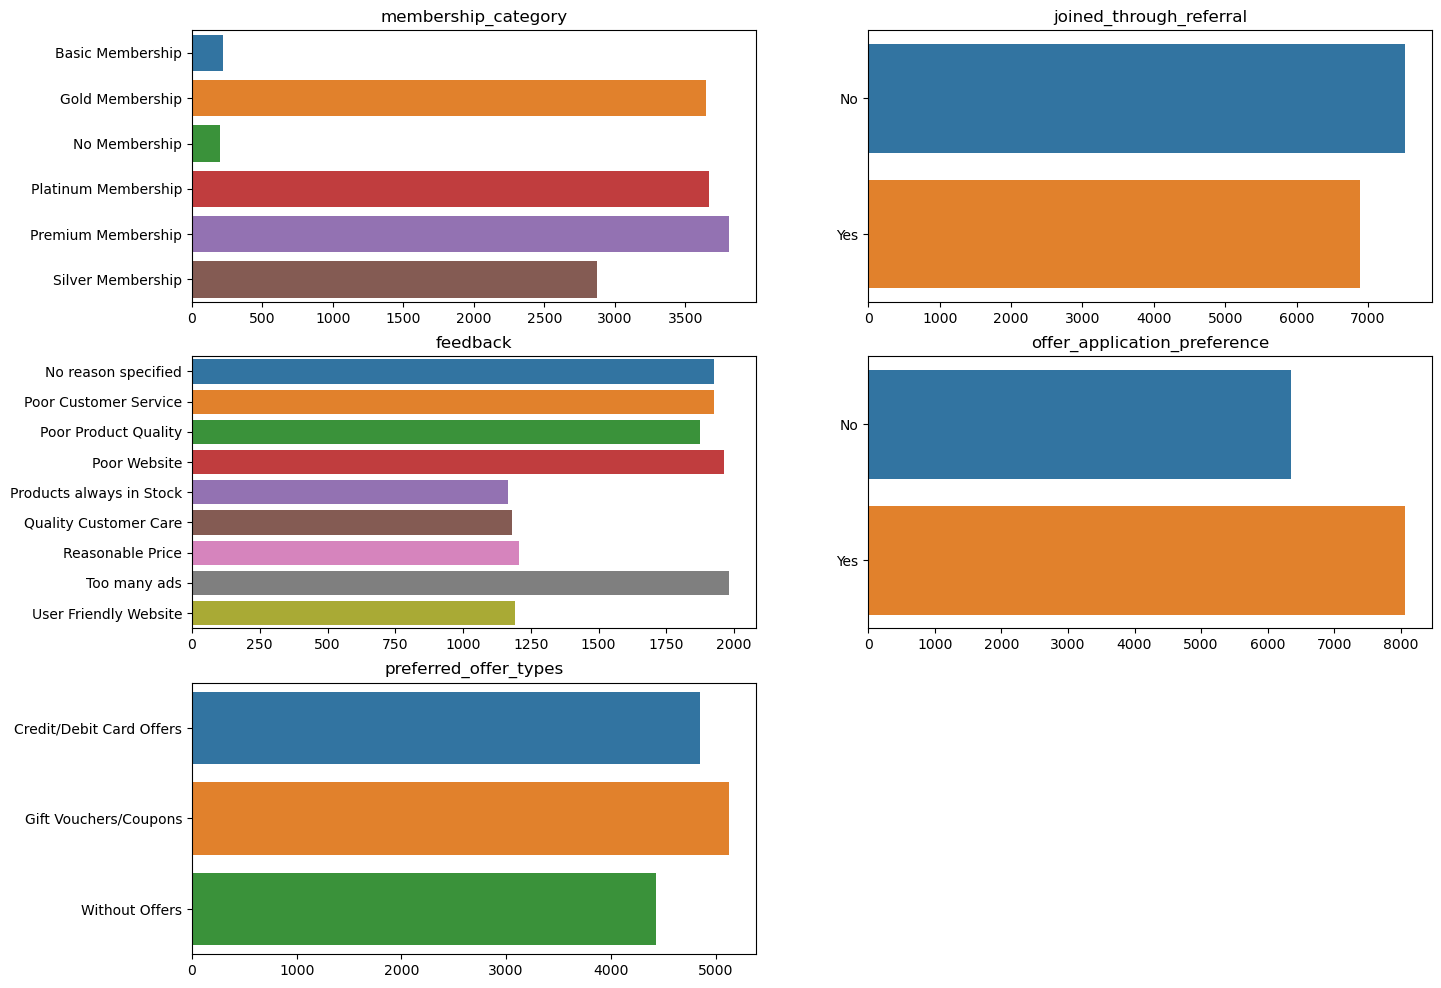

In [21]:
# Making a figure with 16 x 12 size
plt.figure(figsize=[16,12])
df_1 = df[df['churn_risk_score']==0]

count  = 321
for i in cat_col:
    plt.subplot(count)
    sns.barplot(data=df_1, y=df_1.groupby(i).size().index, x=df_1.groupby(i).size().values)
    plt.title(i)
    plt.ylabel('')
    count += 1


Dari visualisasi diatas penulis memperoleh informasi mengenai customer yang tidak churn sbb :
- Sangat sedikit customer yang tidak memiliki membership ataupun hanya basic membership
- Feedback negatif mendominasi meski terdapat juga feedback positif 
- Perbandingan antara customer yang mendaftar dengan refferal dan tidak relatif sama
- Perbandingan antara customer yang menggunakan offer dan jenis offer yang di pakai juga relatif sama

# 5 - Feature Engineering

Setelah memperoleh informasi pada analisa deskriptif, penulis ingin melakukan data preprosesing sebelum digunakan dalam model training

## Cek Distrisbusi Data Target

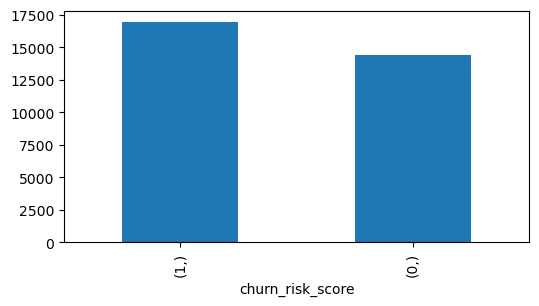

In [22]:
plt.figure(figsize=[6,3])
df[target].value_counts().plot(kind='bar')
plt.show()

## Cek Multicolinarity
Pengecekan multicolinarity menggunakan nilai dari VIF ( Variance Inflation Factor )

In [23]:
# make vif function
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
    
# check vif value
X = df[num_col]
calc_vif(X)

,variables,VIF
0,points_in_wallet,4.66
1,avg_transaction_value,2.88
2,avg_frequency_login_days,2.90
3,avg_time_spent,1.63
4,days_since_join,3.36
5,days_since_last_login,3.82


Dari hasil pengecekan diperoleh bahwa `semua kolom` Memiliki Nilai Multicolinarity yang cukup rendah

## Splitting Train and Validation and Test
Karena data sedikit imbalance maka split data mempertimbangkan persentase imbalance data dengan mengatur parameter `stratify` pada fungsi train tes split

In [24]:
# Pisahkan data train dan data test dengan train test split
data_train, data_test = train_test_split(df, test_size=0.1, random_state=10, stratify=df[target])
print(f"train size : {data_train.shape}")
print(f"test size : {data_test.shape}")

train size : (28178, 12)
test size : (3131, 12)


In [25]:
# Pisahkan data train dan data validation dengan train test split
data_train, data_validation = train_test_split(data_train, train_size=0.9, random_state=10, stratify=data_train[target])
print(f"train size : {data_train.shape}")
print(f"validation size : {data_validation.shape}")

train size : (25360, 12)
validation size : (2818, 12)


## Handling Outlier
Beberapa algoritma machine learning senstif terhadap outlier sehinggal dilakukan handling outlier berdasarkan distribusi datanya

### Nilai Skew Fitur Numerikal

In [26]:
# Looping untuk menghitung nilai skew fitur numerikal
for i in num_col:
        print(f'Nilai Skew {i} : {data_train[i].skew()}')

Nilai Skew points_in_wallet : -0.7835031875629218
Nilai Skew avg_transaction_value : 1.0135284692051725
Nilai Skew avg_frequency_login_days : 0.37877010752364354
Nilai Skew avg_time_spent : 2.2635990633472556
Nilai Skew days_since_join : 0.012356882324334906
Nilai Skew days_since_last_login : -0.12507354289470834


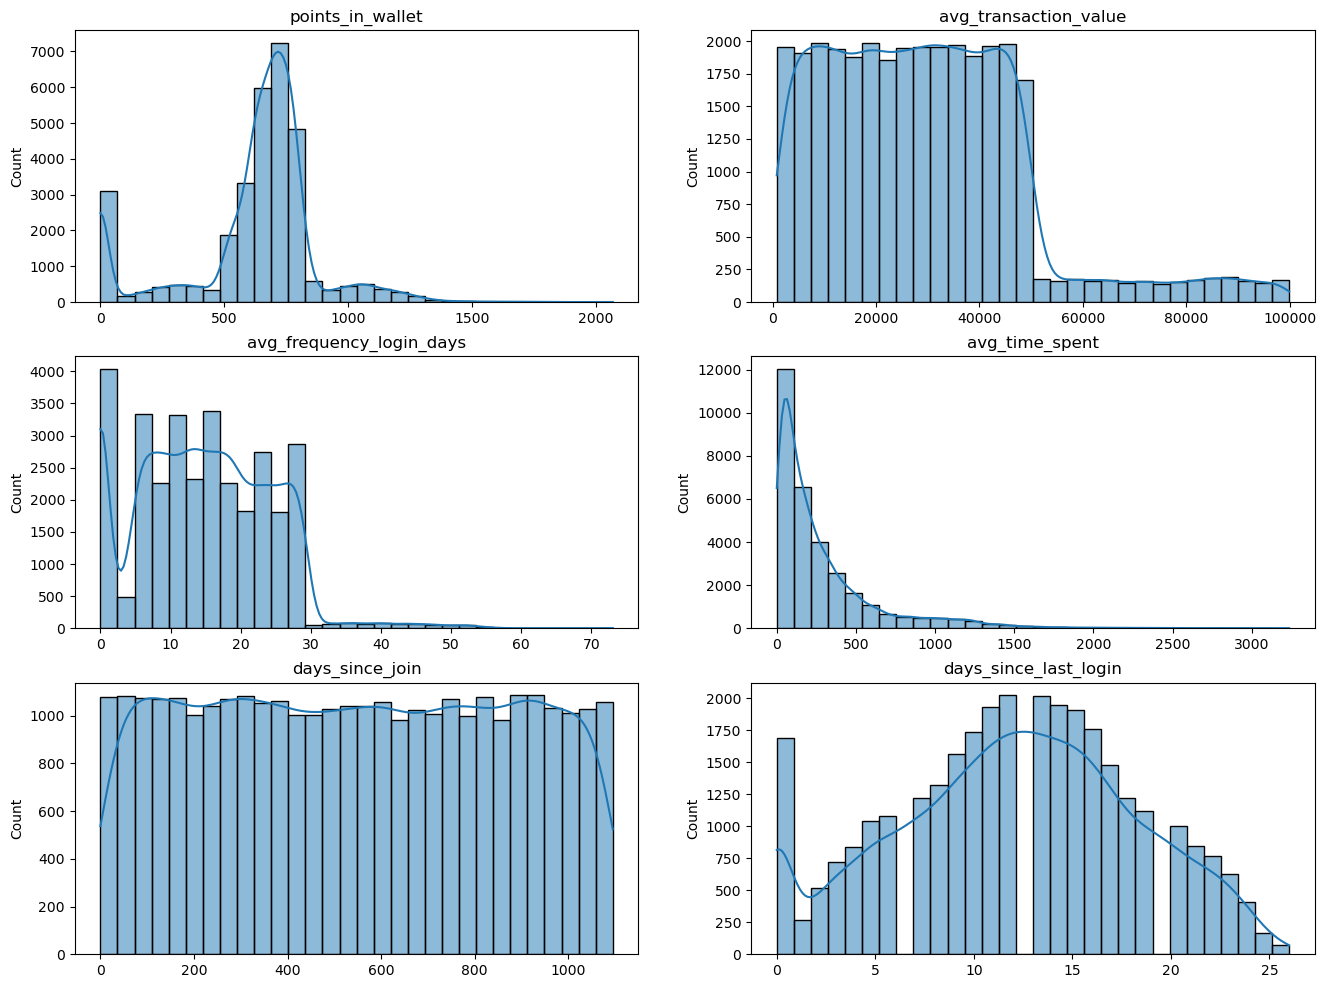

In [27]:
plt.figure(figsize=[16,12])

count = 321
for i in num_col:
    plt.subplot(count)
    sns.histplot(data=df, x=i, bins=30, kde=True)
    plt.title(i)
    plt.xlabel('')
    
    count += 1


Dari nilai skew masing masing kolom dan hasil plotting akan dijadikan acuan untuk pemillihan metode pengecekan outlier. Kolom dengan nilai skew `lebih dari 0.5 dan kurang dari -0.5` adalah kolom dengan `distribusi tidak normal` dan akan dilakukan pengecekan dengan metode `tukey's rule`. Sedangkan yang lainnya memilliki `distribusi normal` dilakukan pengecekan dengan `Z-Score`

In [28]:
# Buat fungsi untuk cek outlier
def cek_outlier(data,col):
  skew = data[col].skew()
  if skew>=-0.5 and skew<=0.5:
    upper_boundary = data[col].mean() + 3*data[col].std()
    lower_boundary = data[col].mean() - 3*data[col].std()
  else:
    Q1 = np.quantile(data[col], 0.25)
    Q3 = np.quantile(data[col], 0.75)
    IQR =  Q3 - Q1
    upper_boundary = Q3 + 3 * IQR
    lower_boundary = Q1 - 3 * IQR
  
  outliers = data[(data[col]<lower_boundary) | (data[col]>upper_boundary)]
  data_clean = data[(data[col]>=lower_boundary) & (data[col]<=upper_boundary)]
  outliers_percent = len(outliers) / len(data) * 100

  return data_clean, outliers, outliers_percent

Selanjutnya akan dilakukan pengecekan pada setiap kolom apakah memiliki persentasi outlier lebih dari 5% atau tidak. Persentase ini akan menentukan bagaimana cara handling outlier tersebut

In [29]:
# Make variabel for feature with ouliers more and less than 5%
under_5 = []
over_5 = []

# Looping data train numerikal
for i in num_col:
    data_clean, outliers, outliers_percent = cek_outlier(data_train, i)
    if outliers_percent < 5:
        under_5.append(i)
    else:
        over_5.append(i)

# Print feature with outlier less than 5%
print(f'Kolom dengan persentase outlier Under 5 %')
for i in under_5:
    data_clean, outliers, outliers_percent = cek_outlier(data_train, i)
    print(f'{i}  = {outliers_percent:.2f} %')

# Print feature with outlier more than 5%
print(f'\nKolom dengan persentase outlier Over 5 %')
for i in over_5:
    data_clean, outliers, outliers_percent = cek_outlier(data_train, i)
    print(f'{i}  = {outliers_percent:.2f} %')

Kolom dengan persentase outlier Under 5 %
avg_transaction_value  = 0.00 %
avg_frequency_login_days  = 0.80 %
avg_time_spent  = 2.34 %
days_since_join  = 0.00 %
days_since_last_login  = 0.00 %

Kolom dengan persentase outlier Over 5 %
points_in_wallet  = 10.16 %


Setelah mengelompokkan feature berdasarkan persentase outlier, kemudian melakukan handling outlier sebagai berikut :
- Less than 5%
    - Trimming from data set
- More than 5%
    - Capping with winsorizer. Capping method is `iqr` because distributin of the data is skewed and fold is `1.5` for moderate skew

In [30]:
# Trimming outlier for column with outliers under 5%
for i in under_5:
    data_train_clean, outliers, outliers_percent = cek_outlier(data_train, i)

In [31]:
# Capping outliers for column with outliers over 5%
capper = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['points_in_wallet'])
capper.fit(data_train)
data_train_clean = capper.transform(data_train)

## Handling Missing Values
Seletah handling outlier, selanjutnya pengecekan missing value dan kemudian dilakukan handling apabila ditemukan missing value

In [32]:
# Check Missing Values pada data train
num_miss_val = 0
for i in df:
    miss_val = data_train_clean[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        print(f'Percentage of missing value {i} : {miss_val/len(data_train_clean[i].values):.2f}%')
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

Tidak Ada Missing Value


In [33]:
# Check Missing Values pada data test
num_miss_val = 0
for i in df:
    miss_val = data_test[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        print(f'Percentage of missing value {i} : {miss_val/len(data_test[i].values):.2f}%')
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

Tidak Ada Missing Value


Dari pengecekan `data train` dan `data test` tidak ditemukan kolom yang memiliki `missing value`

## Splitting Fitur Target

> Setelah dataset bersih dari outlier dan missing value, selanjutnya memisahkan `fitur` dengan `target` dari masing masing `data train` dan `data test`

In [34]:
# Split  `X` (Features) dan `y` (Target) pada Data Train

X_train = data_train_clean.drop(target, axis=1)
y_train = data_train_clean[target]
X_train.head(3)

,membership_category,feedback,points_in_wallet,avg_transaction_value,avg_frequency_login_days,joined_through_referral,offer_application_preference,preferred_offer_types,avg_time_spent,days_since_join,days_since_last_login
11050,Silver Membership,Poor Product Quality,702.16,27732.68,12.00,Yes,No,Gift Vouchers/Coupons,0.00,679,11
31489,Gold Membership,Poor Website,689.54,35980.68,26.00,No,No,Credit/Debit Card Offers,33.56,224,3
16939,Gold Membership,Products always in Stock,768.29,56662.15,0.00,No,No,Gift Vouchers/Coupons,102.99,612,20


In [35]:
# Split  `X` (Features) dan `y` (Target) pada Data Validation

X_val = data_validation.drop(target, axis=1)
y_val = data_validation[target]
X_val.head(3)

,membership_category,feedback,points_in_wallet,avg_transaction_value,avg_frequency_login_days,joined_through_referral,offer_application_preference,preferred_offer_types,avg_time_spent,days_since_join,days_since_last_login
26537,Gold Membership,Too many ads,986.84,3183.05,10.00,No,Yes,Without Offers,62.11,492,22
24940,No Membership,Poor Customer Service,663.65,7195.20,28.00,Yes,No,Gift Vouchers/Coupons,56.91,912,17
20535,Platinum Membership,Poor Product Quality,736.68,34913.69,8.00,Yes,Yes,Without Offers,527.47,780,9


In [36]:
# Split  `X` (Features) dan `y` (Target) pada Data Test

X_test = data_test.drop(target, axis=1)
y_test = data_test[target]
X_test.head(3)

,membership_category,feedback,points_in_wallet,avg_transaction_value,avg_frequency_login_days,joined_through_referral,offer_application_preference,preferred_offer_types,avg_time_spent,days_since_join,days_since_last_login
22203,Basic Membership,Poor Product Quality,710.03,9860.15,21.00,Yes,Yes,Credit/Debit Card Offers,87.05,893,9
7826,No Membership,Poor Website,552.05,29494.03,10.00,No,Yes,Without Offers,33.55,242,3
35788,Gold Membership,Poor Website,782.21,6329.02,0.00,No,Yes,Gift Vouchers/Coupons,30.92,140,25


## Split between Numerik Columns and String Columns

Memisahkan kolom yang masih berbentuk string dengan yang sudah berbentuk numerik untuk dilakukan encoding pada data string dan scalling pada data numerik.

In [37]:
# separate numerikal and string type
numerik = X_train.select_dtypes(include=np.number).columns.tolist()
string = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', numerik)
print('\nCategorical Columns : ', string)

Numerical Columns :  ['points_in_wallet', 'avg_transaction_value', 'avg_frequency_login_days', 'avg_time_spent', 'days_since_join', 'days_since_last_login']

Categorical Columns :  ['membership_category', 'feedback', 'joined_through_referral', 'offer_application_preference', 'preferred_offer_types']


## Feature Scaling

In [38]:
# Tampilkan numerikal data train
X_train[numerik].head(3)

,points_in_wallet,avg_transaction_value,avg_frequency_login_days,avg_time_spent,days_since_join,days_since_last_login
11050,702.16,27732.68,12.00,0.00,679,11
31489,689.54,35980.68,26.00,33.56,224,3
16939,768.29,56662.15,0.00,102.99,612,20


> Karena distribusi data pada fitur `numerikal` sudah `normal`, maka scaling dilakukan dengan menggunakan `StandarScaler`

In [39]:
# Feature Scaling using Standard Karena Distribusi Sudah Memiliki Distribusi Normal

scaler = StandardScaler()
feature_names = scaler.get_feature_names_out(input_features=numerik)

X_train_num_scaled = scaler.fit_transform(X_train[numerik])
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=feature_names)

X_test_num_scaled = scaler.transform(X_test[numerik])
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=feature_names)

X_train_num_scaled.head(3)

,points_in_wallet,avg_transaction_value,avg_frequency_login_days,avg_time_spent,days_since_join,days_since_last_login
0,0.29,-0.08,-0.28,-0.85,0.42,-0.18
1,0.24,0.34,1.20,-0.74,-1.01,-1.48
2,0.55,1.40,-1.55,-0.54,0.21,1.29


## Feature Encoding
Terdapat 2 jenis data categorical string yaitu education dan marital status. Dimana education memiliki tingkatan sehingga dilakukan encoding dengan Ordinal Encoder dan Marital status tidak memiliki tingkatan sehingga dilakukan dengan One Hot Encoder

In [40]:
# Tampilkan data train berbentuk string
X_train[string].head(3)

,membership_category,feedback,joined_through_referral,offer_application_preference,preferred_offer_types
11050,Silver Membership,Poor Product Quality,Yes,No,Gift Vouchers/Coupons
31489,Gold Membership,Poor Website,No,No,Credit/Debit Card Offers
16939,Gold Membership,Products always in Stock,No,No,Gift Vouchers/Coupons


In [41]:
# Feature Encoding menggunakan OneHotEncoder dan OrdinalEcoder
ohe_cat = ['feedback', 'preferred_offer_types']
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_cat_ohe = ohe.fit_transform(X_train[ohe_cat])
feature_names_ohe = ohe.get_feature_names_out(input_features=ohe_cat)
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, columns=feature_names_ohe)

X_test_cat_ohe = ohe.transform(X_test[ohe_cat])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, columns=feature_names_ohe)

# make categories for ordinal encoder
ode_cat = ['No Membership', 'Basic Membership', 'Silver Membership','Gold Membership', 'Premium Membership', 'Platinum Membership']
# make encoder for orde feature
ode_orde_cat = ['membership_category']
ode = OrdinalEncoder(categories=[ode_cat])

X_train_cat_ode = ode.fit_transform(X_train[ode_orde_cat])
X_train_cat_ode = pd.DataFrame(X_train_cat_ode, columns=['membership_category'])

X_test_cat_ode = ode.transform(X_test[ode_orde_cat])
X_test_cat_ode = pd.DataFrame(X_test_cat_ode, columns=['membership_category'])

X_train_cat_encoded = pd.concat([X_train_cat_ode, X_train_cat_ohe], axis=1)
X_test_cat_encoded = pd.concat([X_test_cat_ode, X_test_cat_ohe], axis=1)

# make ordinal encoder for binary column
ode_biner_cat = ['joined_through_referral', 'offer_application_preference']
ode_biner = OrdinalEncoder()

X_train_cat_ode_biner = ode_biner.fit_transform(X_train[ode_biner_cat])
X_train_cat_ode_biner = pd.DataFrame(X_train_cat_ode_biner, columns=['joined_through_referral', 'offer_application_preference'])

X_test_cat_ode_biner = ode_biner.transform(X_test[ode_biner_cat])
X_test_cat_ode_biner = pd.DataFrame(X_test_cat_ode_biner, columns=['joined_through_referral', 'offer_application_preference'])

# concate all cloumn
X_train_cat_encoded = pd.concat([X_train_cat_ode, X_train_cat_ode_biner, X_train_cat_ohe], axis=1)
X_test_cat_encoded = pd.concat([X_test_cat_ode, X_test_cat_ode_biner, X_test_cat_ohe], axis=1)

# X_test_cat_encoded
X_train_cat_encoded.head(3)

,membership_category,joined_through_referral,offer_application_preference,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,2.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


## Making Final Data

Menggabungkan data numerikal yang sudah di scaling dan categorical yang sudah di encode

In [42]:
# Gabungkan kembali fitur numerikal dan kategorial

X_train_concat = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_concat = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_concat.head(3)

,points_in_wallet,avg_transaction_value,avg_frequency_login_days,avg_time_spent,days_since_join,days_since_last_login,membership_category,joined_through_referral,offer_application_preference,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,0.29,-0.08,-0.28,-0.85,0.42,-0.18,2.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.24,0.34,1.20,-0.74,-1.01,-1.48,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0.55,1.40,-1.55,-0.54,0.21,1.29,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


## Making Preprocessing Transformer
Kemudian menggabungkan beberapa preprocessing menjadi satu bagian menggunakan column transformer

In [43]:
# make a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", scaler, numerik),
        ("ohe", ohe, ohe_cat),
        ('ode', ode, ode_orde_cat),
        ('ode_biner', ode_biner, ode_biner_cat)
        ])

# fit the column transformer
preprocessor = preprocessor.fit(X_train)

In [44]:
# trasnform all data train, data validation dan data test
X_train_final = preprocessor.transform(X_train)
X_val_final = preprocessor.transform(X_val)
X_test_final = preprocessor.transform(X_test)

# 6 - Model Definition

## Tensorflow Dataset Loading
Setelah dataset selesai di lakukan preprocessing, selanjutnya adalah membuat membuat dataset yang sesuai untuk tensorflow menggunakan dataset yang telah dilakukan preprocessing

In [45]:
# make train dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128).prefetch(tf.data.AUTOTUNE)

# make a validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val))
val_dataset = val_dataset.batch(128).prefetch(tf.data.AUTOTUNE)

# make a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test))
test_dataset = test_dataset.batch(128).prefetch(tf.data.AUTOTUNE)

Pada code diatas dilakukan proses `shuffling` pada data train sebelum dipecah menjadi beberapa batch dengan setiap batch berisi` 128 data`.

Namun pada data validation dan data test hanya di lakukan pembagian batch saja tanpa dilakukan shuffling karena pada data validation dan data test tidak dilakukan proses training sehingga tidak diperlukan data yang konvergen.

## Define Architecture and Compiler
Selanjutnya penulis membangun arsitektur dari model menggunakan 2 jenis API yaitu sequential dan functional API serta compiler untuk kedua model

In [46]:
# Model's Architecture Using Sequential API
model_sequential = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = X_train_final.shape[1], activation ='relu' ,input_shape=(X_train_final.shape[1], )), # input layer
    tf.keras.layers.Dense(units = 114, activation = 'relu'), # hidden layers
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid') # output layers
    ])

In [47]:
# Model's Architecture Using Functional API
input_layer = tf.keras.Input(shape=(X_train_final.shape[1],), name="fitur")
hl_1 = tf.keras.layers.Dense(21, activation="tanh", name="dense_1")(input_layer)
hl_2 = tf.keras.layers.Dense(114, activation="tanh", name="dense_2")(hl_1)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid", name="predictions")(hl_2)
model_functional = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In [48]:
# Define Training Configuration (Optimizer, Loss, Metrics)
def model_compiler(model):
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics='accuracy',
    )
    return model

Pada code diatas penulis membangun arsitektur dengan keterangan sbb :
- Sequential API
    - Jumlah layer 3
        - Input layar 21 neuron sesuai dengan dimensi data train
        - Hidden layer hanya 1 layers saja. Jumlah neuron hidden layer berdasarkan perhitungan (Jumlah data / (alfa * (Neuron Input + Neuron Output)))
        - Output layer hanya memiliki 1 neuron sesuai dengan dimensi target
    - Fungsi aktivasi
        - Input layer dan hidden layer menggunakan fungsi aktivasi `relu`
        - Output layer karena merupakan prediksi binary maka menggunakan fungsi aktivasi `sigmoid`
- Functional API
    - Seacara umum memiliki arsitektur yang sama pada jumlah layer dan jumlah neuron. Yang membedakan adalah functional API menggunakan fungsi aktivasi `tanh` pada input dan hidden layer
- Compiler
    - Compiler menggunakan metrcis `accuracy` dan loss function `binary_crossentrophy` karena target prediksi memiliki 1 label dengan binary class
    - Optimizer yang digunakan adalah `Adaptive Moment Estimation (ADAM)`

## Define Callback
Pada Artificial Neural Network perlu diberikan sebuah fungsi untuk menghentikan proses training apabila model sudah mencapai performa terbaik untuk menhindari penurunan performa model. Oleh karena itu perlu di definisikan sebuah fungsi yang memiliki kondisi tertentu agar model berhenti melakukan training

In [49]:
# define callback
cb_seq= [
    EarlyStopping(monitor='val_loss', patience= 3),
    ModelCheckpoint('model_best_seq.hdf5', monitor='val_loss', save_best_only=True)
]

cb_func= [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint('model_best_func.hdf5', monitor='val_loss', save_best_only=True)
]

Pada fungsi call back di atas, model akan berhenti melakukan proses training apabila `nilai loss dari data validation mengalami kenaikan` dari yang sebelumnya. Apabiala saat pembelajaran model mengalami hal tersebut sebanyak `3` kali maka model akan menghentikan proses pembelajaran

# 7 - Model Training
Pada proses training model diberikan kesempatan belajar sebanyak `100 kali` namun dengan pembatasan sesuai dengan fungsi callback yang sudah di defenisikan sebelumnya.

In [50]:
## Compile model sequential and functional
model_sequential_compiled = model_compiler(model_sequential)
model_functional_compiled = model_compiler(model_functional)

## Train model and save history into variabel
with tf.device('/gpu:0'):
    history_sequential = model_sequential_compiled.fit(train_dataset, epochs=100, verbose = 0, validation_data=val_dataset, callbacks=cb_seq)
    history_functional = model_functional_compiled.fit(train_dataset, epochs=100, verbose = 0, validation_data=val_dataset, callbacks=cb_func)

# 8 - Model Evaluation

Setelah model melakukan proses training, penulis mencoba melakukan evaluasi terhadap model dengan menggunakan data history dari proses training model

## Model Summary
### Model Architecture

In [51]:
# model summary
model_sequential_compiled.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 dense_1 (Dense)             (None, 114)               2508      
                                                                 
 dense_2 (Dense)             (None, 1)                 115       
                                                                 
Total params: 3,085
Trainable params: 3,085
Non-trainable params: 0
_________________________________________________________________


In [52]:
# model summary
model_functional_compiled.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fitur (InputLayer)          [(None, 21)]              0         
                                                                 
 dense_1 (Dense)             (None, 21)                462       
                                                                 
 dense_2 (Dense)             (None, 114)               2508      
                                                                 
 predictions (Dense)         (None, 1)                 115       
                                                                 
Total params: 3,085
Trainable params: 3,085
Non-trainable params: 0
_________________________________________________________________


Sesuai dengan arsitektur yand di bangun, baik model dengan sequential API maupun fucntional API memiliki informasi sbb:
- Jumlah `Parameter` yang sama yaitu `3085` parameter. 
- Yang membedakan kedua arsitekur adalah fungsi aktivasi pada input layer dan hidden layernya.
- Jumlah layer sama yaitu 3 layer

### Model Accuracy and Loss 
Dengan menggunakan history dari proses pembelajarn mode, penulis melakukan plotting terhadap akurasi dan besaran loss dari setiap cycle pembelajaran model

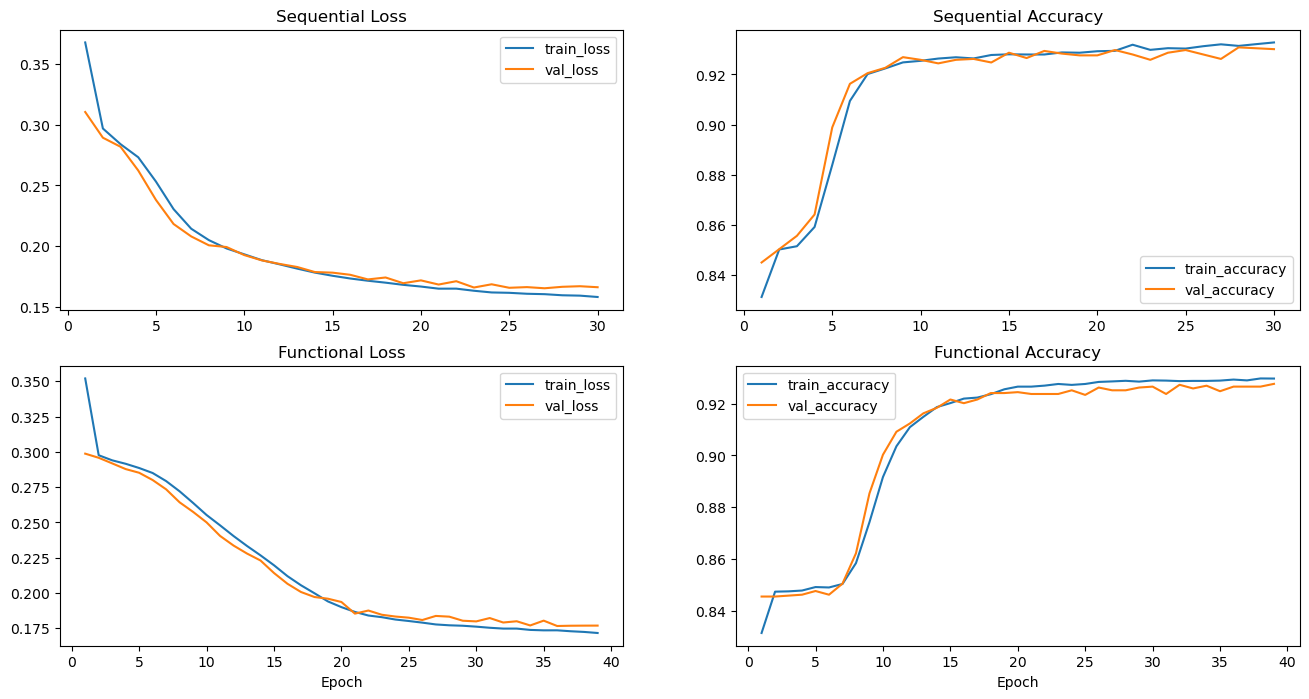

In [53]:
# define epoch
epoch_seq=len(history_sequential.epoch)
epoch_func=len(history_functional.epoch)

# make figure
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16,8))

# plot model sequential loss
ax[0,0].plot(range(1,epoch_seq+1),history_sequential.history['loss'],label='train_loss')
ax[0,0].plot(range(1,epoch_seq+1),history_sequential.history['val_loss'],label='val_loss')
ax[0,0].set_title('Sequential Loss')
ax[0,0].legend()

# plot model sequential accuracy
ax[0,1].plot(range(1,epoch_seq+1),history_sequential.history['accuracy'],label='train_accuracy')
ax[0,1].plot(range(1,epoch_seq+1),history_sequential.history['val_accuracy'],label='val_accuracy')
ax[0,1].set_title('Sequential Accuracy')
ax[0,1].legend()

# plot model functional loss
ax[1,0].plot(range(1,epoch_func+1),history_functional.history['loss'],label='train_loss')
ax[1,0].plot(range(1,epoch_func+1),history_functional.history['val_loss'],label='val_loss')
ax[1,0].legend()
ax[1,0].set_title('Functional Loss')
ax[1,0].set_xlabel('Epoch')

# plot model functional accuracy
ax[1,1].plot(range(1,epoch_func+1),history_functional.history['accuracy'],label='train_accuracy')
ax[1,1].plot(range(1,epoch_func+1),history_functional.history['val_accuracy'],label='val_accuracy')
ax[1,1].legend()
ax[1,1].set_title('Functional Accuracy')
ax[1,1].set_xlabel('Epoch')

plt.show()

Dari hasil plot diatas diperoleh informasi sbb:

- Tidak ditemukan gradient exploding maupun vanishing pada kedua model
- Sequential
    - Nilai loss pada validation dataset mengalami kenaikan mulai epoch 21 sehingga model menghentikan proses training sesuai kondisi fungsi callback
    - Accuracy pada data validation menurun pada epoch ke 23
- Functional
    - Dari epcoh pertama loss model mengalami penurunan hingga epoch ke 25. Dari epoch ke 25 loss pada data validtion sudah meningkat
    - Accuaracy juga mengalami hal yang sama meningkat sejak epoch pertama dan menurun pada epoch ke 25 sehingga proses training di hentikan

## Model Evalute on Data Test

In [54]:
## Evaluate on a dataset test.

with tf.device('/gpu:0'):
    result_sequential = model_sequential_compiled.evaluate(test_dataset, verbose=0)
    result_functional = model_functional_compiled.evaluate(test_dataset, verbose=0)
print("Evaluate Model Sequential on test data")
print('Test - Loss     : ', result_sequential[0])
print('Test - Accuracy : ', result_sequential[1])
print('')
print("Evaluate Model Functional on test data")
print('Test - Loss     : ', result_functional[0])
print('Test - Accuracy : ', result_functional[1])

Evaluate Model Sequential on test data
Test - Loss     :  0.1532861888408661
Test - Accuracy :  0.9335675239562988

Evaluate Model Functional on test data
Test - Loss     :  0.1642397791147232
Test - Accuracy :  0.9313318133354187


Performa pada data test tidak begitu berbeda antara sequential api dan fucntinal api yaitu pada range `0.93`. 

Namun sedikit lebih baik pada sequntial API dengan `0.9332`

Kedua model diatas sudah memiliki predikat `best fit`

# 9- Model Optimization
Dari hasil evaluasi diatas, penulis mencoba melakukan beberapa optimisasi untuk mendapatkan performa yang lebih baik dari sisi nilai accuracyy, waktu training, maupun, kompleksitas dari model

## Define Architecture and Compiler

Pada code berikut penulis membangun arsitektur dengan keterangan sbb :
- Sequential API
    - Jumlah layer 4
        - Input layar 21 neuron sesuai dengan dimensi data train
        - Menambah 1 hidden layer dibanding model sebelumnya. Jumlah neuron hidden pada hidden layer dibuat sesedikit mungkin agar model memiliki waktu training yang lebih cepat. Penulis memilih kombinasi pangkat dua dari nilai 2.
        - Output layer sama dengan model awal hanya memiliki 1 neuron sesuai dengan dimensi target
    - Fungsi aktivasi
        - Input layer dan hidden layer diubah menjadi fungsi aktivasi `relu` yang sebelumny adalah `tanh`
        - Output layer karena merupakan prediksi binary maka menggunakan fungsi aktivasi `sigmoid`

In [55]:
# Model's Architecture Using Sequential API
model_sequential_optimize = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = X_train_final.shape[1], activation ='relu' ,input_shape=(X_train_final.shape[1], )), # input layer
    tf.keras.layers.Dense(units = 4, activation = 'tanh'),
    tf.keras.layers.Dense(units = 2, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid') # output layers
    ])

Pada code berikut penulis membangun arsitektur dengan keterangan sbb :
- Fucntinal API
    - Jumlah layer 5
        - Input layar 21 neuron sesuai dengan dimensi data train
        - Menambah 2 hidden layer dibanding model sebelumnya sehingga total adalah 3 hidden layer. Jumlah neuron hidden pada hidden layer dibuat sesedikit mungkin agar model memiliki waktu training yang lebih cepat. Penulis memilih kombinasi pangkat dua dari nilai 2.
        - Output layer sama dengan model awal hanya memiliki 1 neuron sesuai dengan dimensi target
    - Fungsi aktivasi
        - Input layer dan hidden layer diubah menjadi fungsi aktivasi `tanh` yang sebelumny adalah `relu`
        - Output layer karena merupakan prediksi binary maka menggunakan fungsi aktivasi `sigmoid`

In [56]:
# Model's Architecture Using Functional API
input_layer_optimize = tf.keras.Input(shape=(X_train_final.shape[1],), name="fitur")
hl_1_optimize = tf.keras.layers.Dense(21, activation="relu", name="dense_1")(input_layer_optimize)
hl_2_optimize = tf.keras.layers.Dense(8, activation="relu", name="dense_2")(hl_1_optimize)
hl_3_optimize = tf.keras.layers.Dense(4, activation="relu", name="dense_3")(hl_2_optimize)
hl_4_optimize = tf.keras.layers.Dense(2, activation="relu", name="dense_4")(hl_3_optimize)
output_layer_optimize = tf.keras.layers.Dense(1, activation="sigmoid", name="predictions")(hl_4_optimize)
model_functional_optimize = tf.keras.Model(inputs=input_layer_optimize, outputs=output_layer_optimize)

Compiler yang dibangun memiliki komponen penyusun sbb :
- Compiler menggunakan metrcis `accuracy` dan loss function `binary_crossentrophy` karena target prediksi memiliki 1 label dengan binary class
- Optimizer yang digunakan masih tetap `Adaptive Moment Estimation (ADAM)` namun diatur besaran learning rate menjadi 0.001 dengan harapan model dapat belajar lebih detail

In [57]:
# Define Training Configuration (Optimizer, Loss, Metrics)
def model_compiler_tune(model):
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics='accuracy',
    )
    return model

Fungsi yang dibangun memiliki komponen penyusun yang sama dengan sebelumnya namun hanya melakukan penambahan jumlah `patience` yang semula `3` menjadi `5`

In [58]:
# define callback
callbacks_seq= [
    EarlyStopping(monitor='val_loss', patience= 5),
    ModelCheckpoint('model_best_seq_tuned.hdf5', monitor='val_loss', save_best_only=True)
]

callbacks_func= [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint('model_best_func_tuned.hdf5', monitor='val_loss', save_best_only=True)
]

## Model Training

In [59]:
## Compile model sequential and functional
model_sequential_tuned = model_compiler_tune(model_sequential_optimize)
model_functional_tuned = model_compiler_tune(model_functional_optimize)

## Train model and save history into variabel
with tf.device('/gpu:0'):
    history_sequential_tuned = model_sequential_tuned.fit(train_dataset, epochs=200, verbose = 0, validation_data=val_dataset, callbacks=callbacks_seq)
    history_functional_tuned = model_functional_tuned.fit(train_dataset, epochs=200, verbose = 0, validation_data=val_dataset, callbacks=callbacks_func)

## Model Summary

In [60]:
# model summary
model_sequential_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 21)                462       
                                                                 
 dense_4 (Dense)             (None, 4)                 88        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


In [61]:
# model summary
model_functional_tuned.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fitur (InputLayer)          [(None, 21)]              0         
                                                                 
 dense_1 (Dense)             (None, 21)                462       
                                                                 
 dense_2 (Dense)             (None, 8)                 176       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 predictions (Dense)         (None, 1)                 3         
                                                                 
Total params: 687
Trainable params: 687
Non-trainable param

Model yang dibangun memiliki informasi sbb :
- Jumlah paramater berkurang menjadi `563` pada model sequential dan `687` pada functinal dari sebelumnya `3085`
- Jumlah layer lebih banyak

Kemudian penulis kembali melakukan plotting pada proses pembelajaran model berdasarkan nilai accuracy dan loss pada setiap cycle training

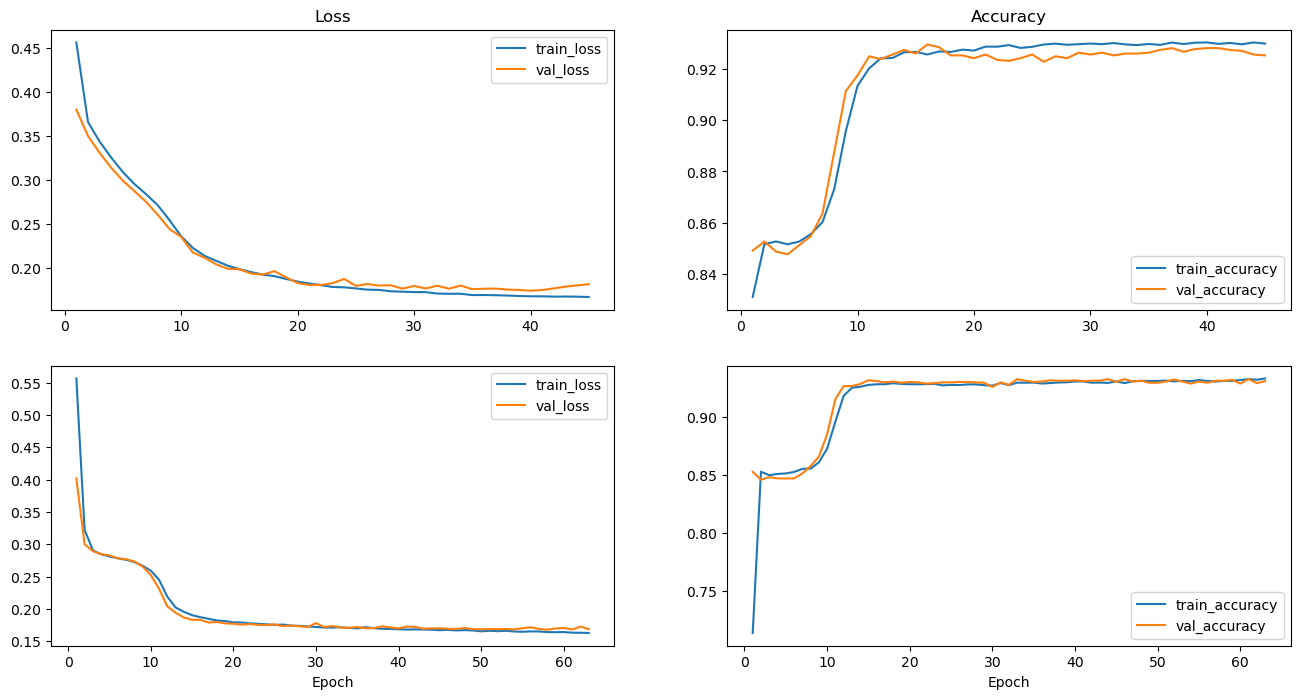

In [62]:
# define epoch
epoch_seq=len(history_sequential_tuned.epoch)
epoch_func=len(history_functional_tuned.epoch)

# make figure
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16,8))

# plot model sequential loss
ax[0,0].plot(range(1,epoch_seq+1),history_sequential_tuned.history['loss'],label='train_loss')
ax[0,0].plot(range(1,epoch_seq+1),history_sequential_tuned.history['val_loss'],label='val_loss')
ax[0,0].set_title('Loss')
ax[0,0].legend()

# plot model sequential accuracy
ax[0,1].plot(range(1,epoch_seq+1),history_sequential_tuned.history['accuracy'],label='train_accuracy')
ax[0,1].plot(range(1,epoch_seq+1),history_sequential_tuned.history['val_accuracy'],label='val_accuracy')
ax[0,1].set_title('Accuracy')
ax[0,1].legend()

# plot model functional loss
ax[1,0].plot(range(1,epoch_func+1),history_functional_tuned.history['loss'],label='train_loss')
ax[1,0].plot(range(1,epoch_func+1),history_functional_tuned.history['val_loss'],label='val_loss')
ax[1,0].legend()
ax[1,0].set_xlabel('Epoch')

# plot model functional accuracy
ax[1,1].plot(range(1,epoch_func+1),history_functional_tuned.history['accuracy'],label='train_accuracy')
ax[1,1].plot(range(1,epoch_func+1),history_functional_tuned.history['val_accuracy'],label='val_accuracy')
ax[1,1].legend()
ax[1,1].set_xlabel('Epoch')

plt.show()

Secara global di bandingkan model sebelumnya terlihat bahwa setelah di optimisasi performa pada data train dan data set lebih dekat satu sama lain.

Model tetap mengalami peningkatan performa dan `tidak ditemukan` gradient explode maupun gradient vanish

## Model Evaluate On Data Test

In [63]:
## Evaluate on a dataset test.

with tf.device('/gpu:0'):
    result_sequential_tuned = model_sequential_tuned.evaluate(test_dataset, verbose=0)
    result_functional_tuned = model_functional_tuned.evaluate(test_dataset, verbose=0)
print("Evaluate Model Sequential on test data")
print('Test - Loss     : ', result_sequential_tuned[0])
print('Test - Accuracy : ', result_sequential_tuned[1])
print('')
print("Evaluate Model Functional on test data")
print('Test - Loss     : ', result_functional_tuned[0])
print('Test - Accuracy : ', result_functional_tuned[1])

Evaluate Model Sequential on test data
Test - Loss     :  0.16659972071647644
Test - Accuracy :  0.93165123462677

Evaluate Model Functional on test data
Test - Loss     :  0.15238380432128906
Test - Accuracy :  0.9348450899124146


- Performa pada data test tidak begitu berbeda dengan model sebelumnya optimisasi yaitu pada range `0.93`. 
- Sedikit mengalami peningkatan pada model Functional API dari `0.9313` menjadi `0.9348`
- Namun mengalami penurunan pada Kedua model Sequential dari `0.9335` mejadi `0.9331` 

## Optimization Conclusion

- Secara global dapat di ambil kesimpulan bahwa model mengalami penignkatan dari segi performa meski tidak begitu signifikan
- Yang cukup berubah adalah arsitektur model dari sebelumnya cukup kompleks dengan banyak total parameter menjadi 1/4 dari total parameter awal
- Pada dataset ini fungsi aktivasi relu membutuhkan architecture yang lebih kompleks dibandingakna dengan fungsi aktivasi tanh

# 10 - Model Saving

Setelah model penulis anggap maksimal maka selanjutnya adalah proses penyimpanan model sehingga dapat di gunakan tanpa harus di lakukan train kembali

Model yang dipilih adalah model yang memiliki nilai Accuracy score paling tinggi

In [64]:
# preprocessor 
with open('preprocessor.pkl', 'wb') as file_1:
  pickle.dump(preprocessor, file_1)

# model
model_functional_tuned.save('best_model.h5')


# 10 - Pengambilan Kesimpulan
## Model Analysis

Beberapa analisa dari model :
- Sebelum dan setelah optimisasi model memiliki performa yang cukup baik pada
- Namun setelah optimisasi performa model sedikit lebih baik menjadi `0.9348` dan menjadi best model untuk digunakan pada model deployment.
- Fungsi aktivasi `relu` memerlukan architectur yang lebih kompleks di bandingkan dengan `tanh`
- Best model memiliki informasi sbb:
    - Jumlah layer 5
    - Input layar 21 neuron sesuai dengan dimensi data train
    - Jumlah hidden layaer adalah 3 layer. 
        - 8 Neuron pada hidden layer 1
        - 4 Neuron pada hidden layer 2
        - 2 Neuron pada hidden layer 3
    - Output layer memiliki 1 neuron sesuai dengan dimensi target
    - Fungsi aktivasi
        - Input layer dan hidden layer adalah fungsi aktivasi `tanh`
        - Output layer karena merupakan prediksi binary maka menggunakan fungsi aktivasi `sigmoid`

### Kelebihan dan Kelamahan Model : 
- Kelebihan :
    - Secara global model cukup baik memprediksi
    - Model memiliki performa yang sama antara data train dan data test
- Kelemahan : 
    - Kombinasi antara jumlah neuron, jumlah layer, fungsi aktivasi dan parameter lainnya harus b

### Further Improvement
Untuk imporvement selanjutnya dari model ini adalah sbb :
- Data preprocessing dengan menggunakan metode lainnya. Seperti metode capping, metode tranformasi lainnya.
- Pada saat dataset loading dengan tensorflow dilakukan proses yang lebih beragam antara shuffle, repeat, atau batch size.
- Melakukan architecture tuning dengan kombinasi jumlah layer, jumlah neuron, dan paramaeter lainnya yang lebih beragam agar mendapatkan model dengan performa lebih baik


## Overall Analysis
### Secara keseluruhan proses yang dilakukan pada project ini adalah:

- Import semua library yang di butuhkan
- Load dataset dan eksplorasi basic info dari data
- Exploarsi Data Analytics untuk menemukan insight. Pada tahapan ini juga mencari informasi menarik atau insight bussiness maupun informasi yang dapat digukanan untuk pemilihan fitur
- Memilih fitur dengan Korelasi antara fitur dengan target menggunakan phik korelasi
- Handling Missin Value
- Feature Engineering dimana pada tahap ini melakukan beberapa hal seperti :
    - Cek multicolinarity
    - Handle outlier dengan cara trimming apabila outlier dibawah 5% dan capping dengan winsorizer jika diatas 5%
    - Scaling dengan Standard Scaler
    - Encoding dengan One Hot Encoder dan Ordinal Encoder
- Dataset Loading dengan Tensorflow pipeline
- Model Defenition and Training
    - Define Architecture dan compiler
- Evaluasi model dengan menggunakan summary dari model dan juga history training. Kemudian menentukan optimisasi apa yang dapat dilakukan agar model memiliki performa lebih baik
- Tuning dengan mencoba beberapa kombinasi arsitektur dan optimizer 
- Saving best model dari baseline model atau model yang sudah di tuning


### Beberapa informasi yang dapat diperoleh dari proses EDA adalah :

- Secara global, customer yang akan `churn` sebanyak `20018 customer` sedangkan yang `tidak` sebanyak `16992`

- Secara global beberapa yang membedakan antara customer yang akan churn dan tidak adalah sbb :
    - Customer yang churn memiliki :
        - Rata - rata `points in wallet` lebih rendah dari yang tidak churn
        - Memiliki `avg transaction` lebih sedikit dari yang tidak churn

- Customer yang churn maupun yang tidak memiliki `demografi days_since_join, day since last login, avg login frequency, dan avg time spent yang relatif serupa.`
- Karakteristik customer yang `akan churn` sbb :
    - Mayoritas Adalah customer yang `tidak memiliki membership dan basic membership` dan sedikit customer dengan gold dan silver membership
    - Semua feedback dari customer adalah `feedback negatif`
    - Perbandingan antara customer yang mendaftar dengan refferal dan tidak relatif sama
    - Perbandingan antara customer yang menggunakan offer dan jenis offer yang di pakai juga relatif sama

- Karakteristik customer yang `tidak churn` sbb :
    - Sangat `sedikit` customer yang tidak memiliki membership ataupun hanya `basic membership`
    - Feedback negatif mendominasi meski terdapat juga `feedback positif` 
    - Perbandingan antara customer yang mendaftar dengan refferal dan tidak relatif sama
    - Perbandingan antara customer yang menggunakan offer dan jenis offer yang di pakai juga relatif sama